<a href="https://colab.research.google.com/github/kevinCortial/graphlearning/blob/main/Harvard/processing_Harvard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Harvard data pre-processing for graph learning </center></h1>

<center> Kévin CORTIAL et Taoufik JARMOUNI &nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp; Open Studio UCA IP / Atlas des Synergies Productives &nbsp;&nbsp;&nbsp; </center>

---

**Needed packages installation :**

In [7]:
pip install networkx==2.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [3]:
pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---

**CSV file importation (Github):**

In [27]:
import pandas as pd

url = 'https://raw.githubusercontent.com/kevinCortial/graphlearning/main/Harvard/data/hs92_proximities.csv'

original_df = pd.read_csv(url)

#print(original_df)

**Graph generation using the HS92 proximities Harvard data:**

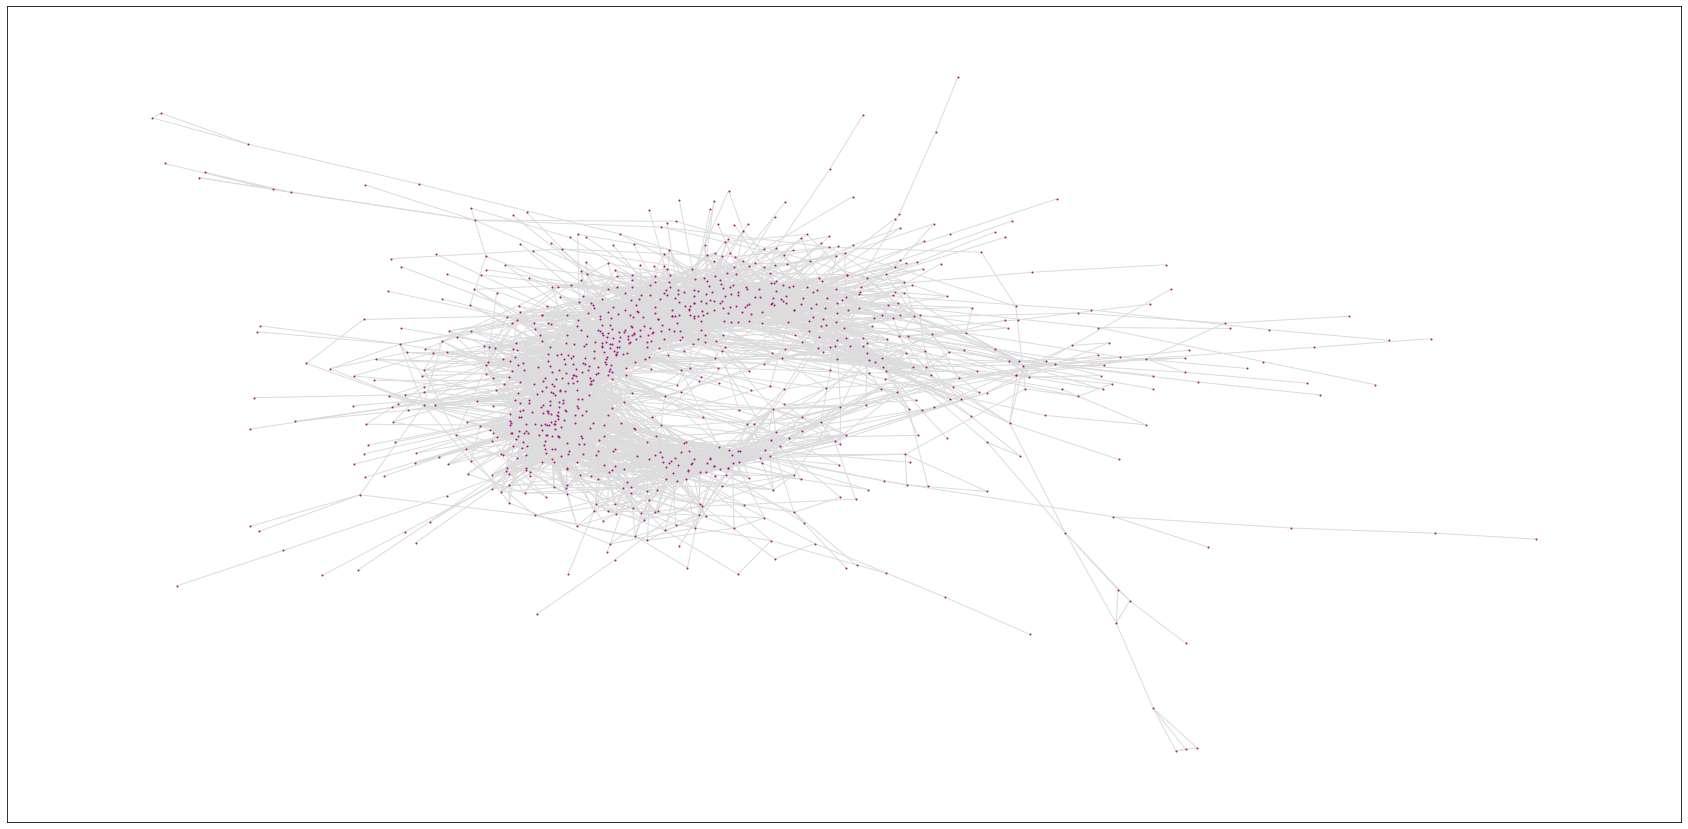

In [28]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def get_graph_from_dataframe(dataframe):
  # We only need the three needed columns
  dataframe = dataframe[["commoditycode_1", "commoditycode_2", "proximity"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] >= 0.5]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe into an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))
  #nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro')
  return dataframe


def get_clean_graph_from_dataframe(dataframe):
  G = nx.from_pandas_adjacency(dataframe)
  centrality = nx.closeness_centrality(G)
  centrality_sort = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1])}
  list_attached_nodes = [key for key, value in centrality_sort.items() if value < 0.1]
  G.remove_nodes_from(list_attached_nodes)
  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=0.1, node_color='#ac1480', edge_color='gainsboro')
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return G


final_df = get_graph_from_dataframe(original_df)
G = get_clean_graph_from_dataframe(final_df)

---

**JSON file importation (Github):**

In [29]:
import json
from urllib.request import urlopen

url = 'https://raw.githubusercontent.com/kevinCortial/graphlearning/main/Harvard/data/network_hs92_4digit.json'

response = urlopen(url)
# storing the JSON response 
# from url in data
data_json = json.loads(response.read())
# print the json response
#print(data_json)

**Graph generation using the network HS92 Harvard data:**

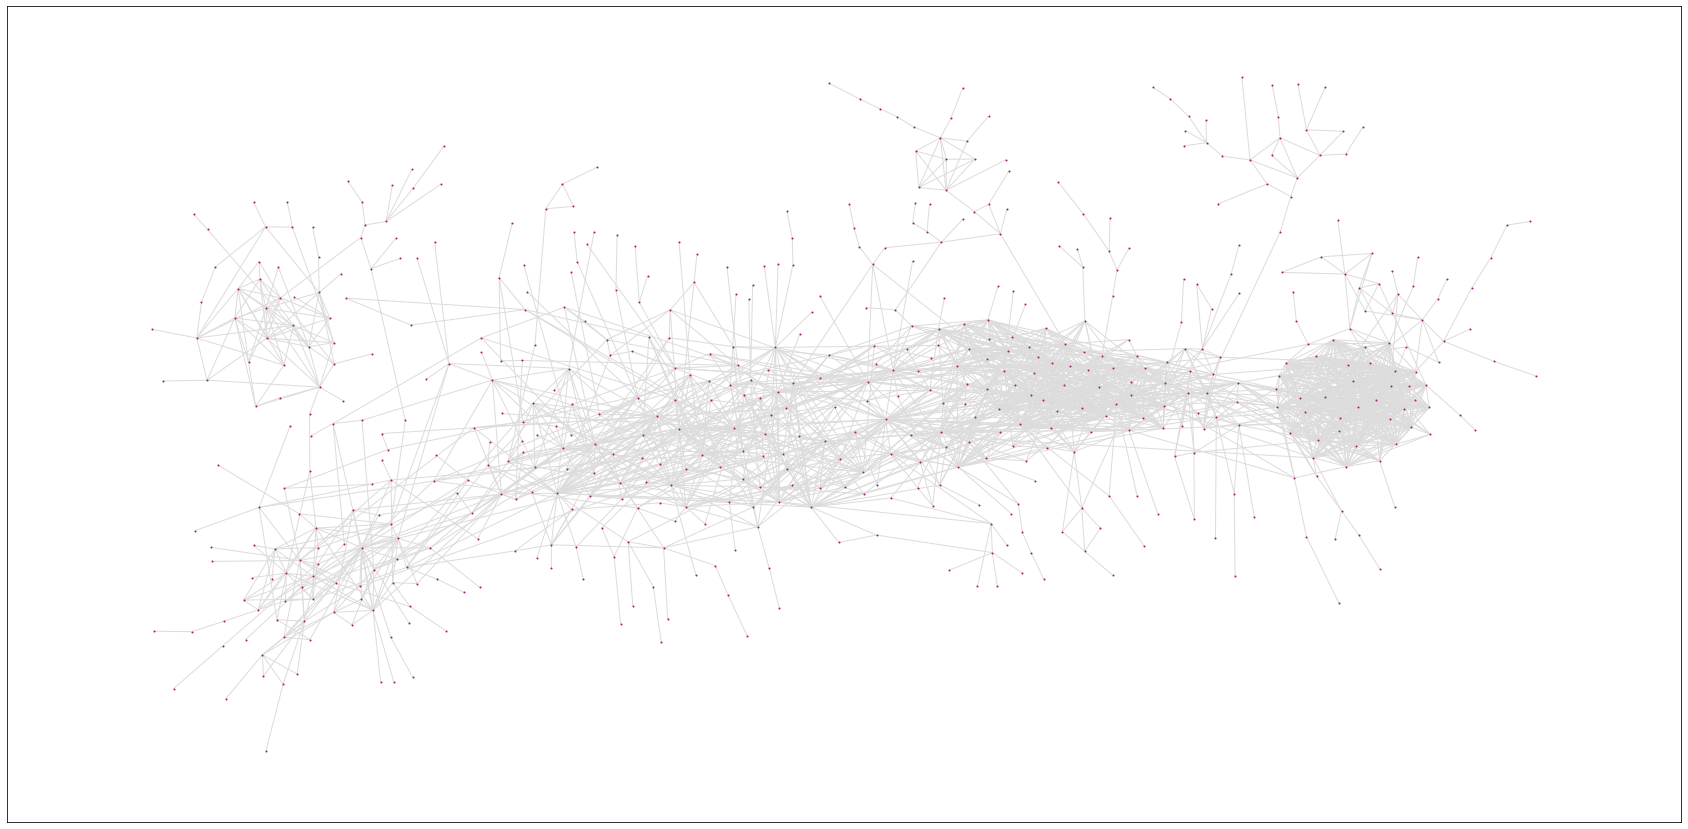

In [30]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# PART TWO, other dataframe (positions):
def get_graph_from_dataframe_hs(dataframe, pos):
  # We only need the three needed columns
  dataframe = dataframe[["source", "target", "strength"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] >= 0.5]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe intro an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))
  nx.set_node_attributes(G, pos, 'coord')
  #nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro', pos = pos)
  return dataframe

def get_graph_from_dataframe_hs_no_pos(dataframe, pos):
  # We only need the three needed columns
  dataframe = dataframe[["source", "target", "strength"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] >= 0.5]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe intro an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))
  nx.set_node_attributes(G, pos, 'coord')
  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro')
  plt.show()
  return dataframe

def get_clean_graph_from_dataframe_hs(dataframe, pos):
  G = nx.from_pandas_adjacency(dataframe)
  
  centrality = nx.closeness_centrality(G)
  centrality_sort = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1])}
  list_attached_nodes = [key for key, value in centrality_sort.items() if value < 0.06]

  
  G.remove_nodes_from(list_attached_nodes)

  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=0.1, node_color='#ac1480', edge_color='gainsboro', pos = pos)
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return G

# First file.json that contains two dataframes, one with nodes infos and the other with the edges
df_nodes = pd.DataFrame(data_json['nodes'])
df_edges = pd.DataFrame(data_json['edges'])

# Dictionary of tuples that contains the positions (x, y) of every node
pos = df_nodes.set_index('id').apply(tuple, 1).groupby(level=0).agg(lambda x: x.values).to_dict()

original_df_positions = df_edges

df_positions = get_graph_from_dataframe_hs(original_df_positions, pos)
#df_no_positions = get_graph_from_dataframe_hs_no_pos(original_df_positions, pos)

G_positions = get_clean_graph_from_dataframe_hs(df_positions, pos)
#G_no_positions = get_clean_graph_from_dataframe_hs_no_pos(df_no_positions)

---

**Louvain partition of the original (previous) graph:**

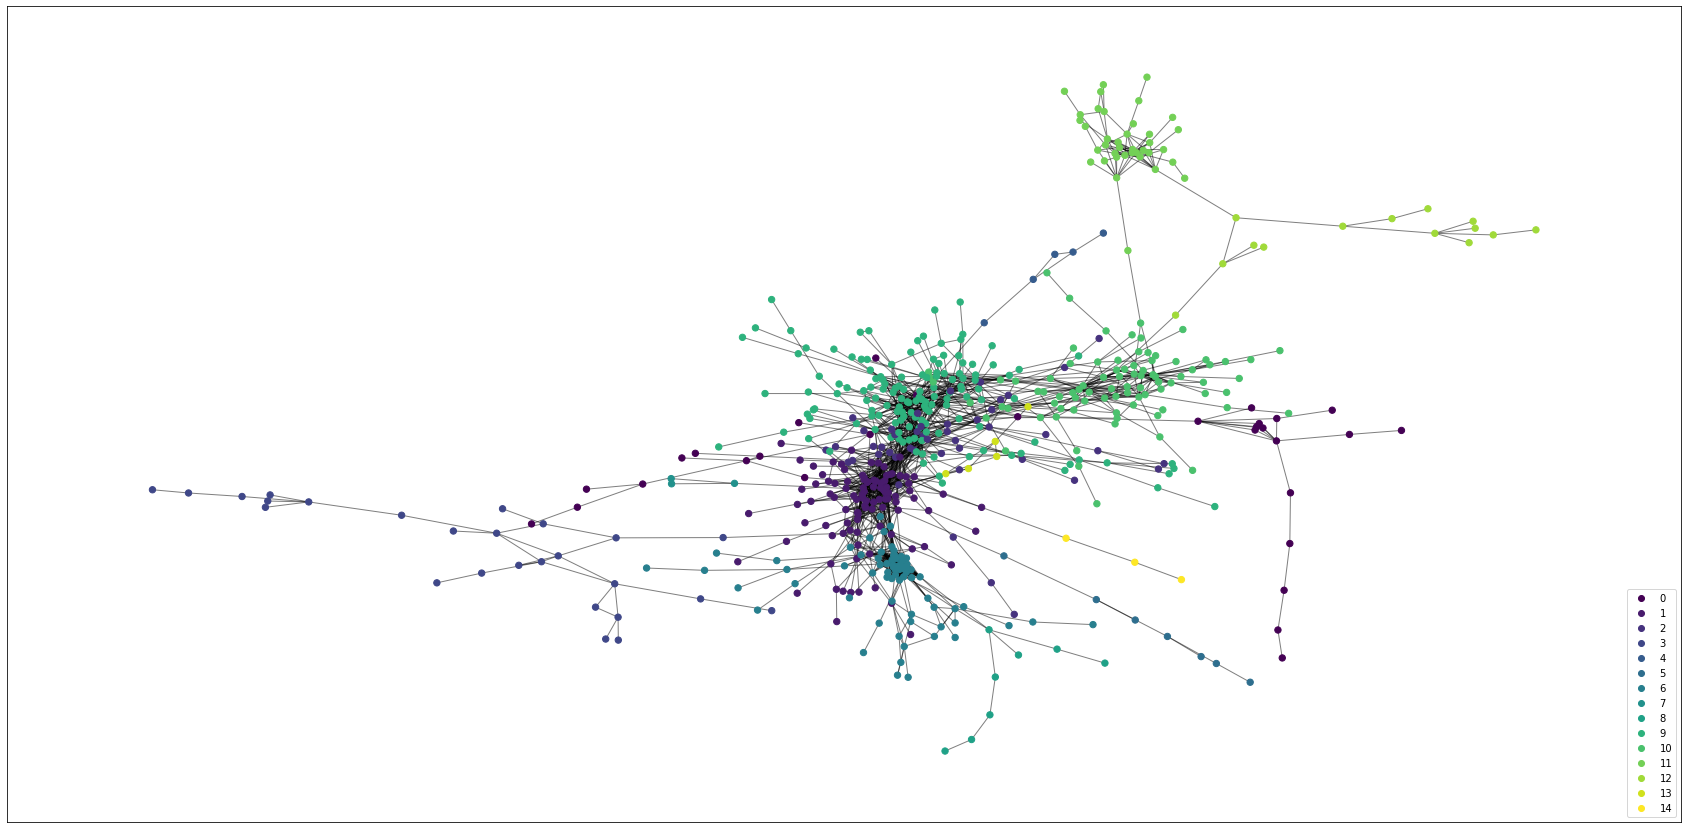

In [31]:
from community import community_louvain

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def get_louvain_graph_from_G(G):
  # Louvain partition
  partition = community_louvain.best_partition(G)

  pos = nx.spring_layout(G)

  # Color the nodes according to their partition
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
  nodes = nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                        cmap=cmap, node_color=list(partition.values()))
  nx.draw_networkx_edges(G, pos, alpha=0.5)

  # Legend creation
  values = sorted(list(set(partition.values())))
  for v in values:
      # Make dummy scatterplot to generate labels
      plt.gca().scatter([],[], color=nodes.cmap(v/np.max(values)), label=v)
  plt.legend(loc='lower right')
  
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return partition

partition = get_louvain_graph_from_G(G_positions)

**I-Louvain**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'1211': 0, '1501': 0, '1504': 0, '1507': 0, '1509': 0, '1511': 0, '1512': 0, '1513': 0, '1514': 0, '1515': 0, '2103': 0, '2502': 0, '2505': 0, '2507': 0, '2508': 0, '2510': 0, '2511': 0, '2512': 0, '2513': 0, '2515': 0, '2516': 0, '2517': 0, '2518': 0, '2519': 0, '2520': 0, '2521': 0, '2522': 0, '2523': 0, '2524': 0, '2601': 0, '2604': 0, '2606': 0, '2609': 0, '2616': 0, '2617': 0, '2620': 0, '2621': 0, '2701': 0, '2705': 0, '2707': 0, '2709': 0, '2710': 0, '2711': 0, '2712': 0, '2713': 0, '2715': 0, '2716': 0, '2801': 0, '2803': 0, '2804': 0, '2806': 0, '2807': 0, '2811': 0, '2815': 0, '2826': 0, '2827': 0, '2836': 0, '2837': 0, '2839': 0, '2845': 0, '2853': 0, '2903': 0, '2916': 0, '2928': 0, '2933': 0, '2936': 0, '2941': 0, '3002': 0, '3003': 0, '3004': 0, '3005': 0, '3006': 0, '3201': 0, '3202': 0, '3204': 0, '3206': 0, '3207': 0, '3208': 0, '3209': 0, '

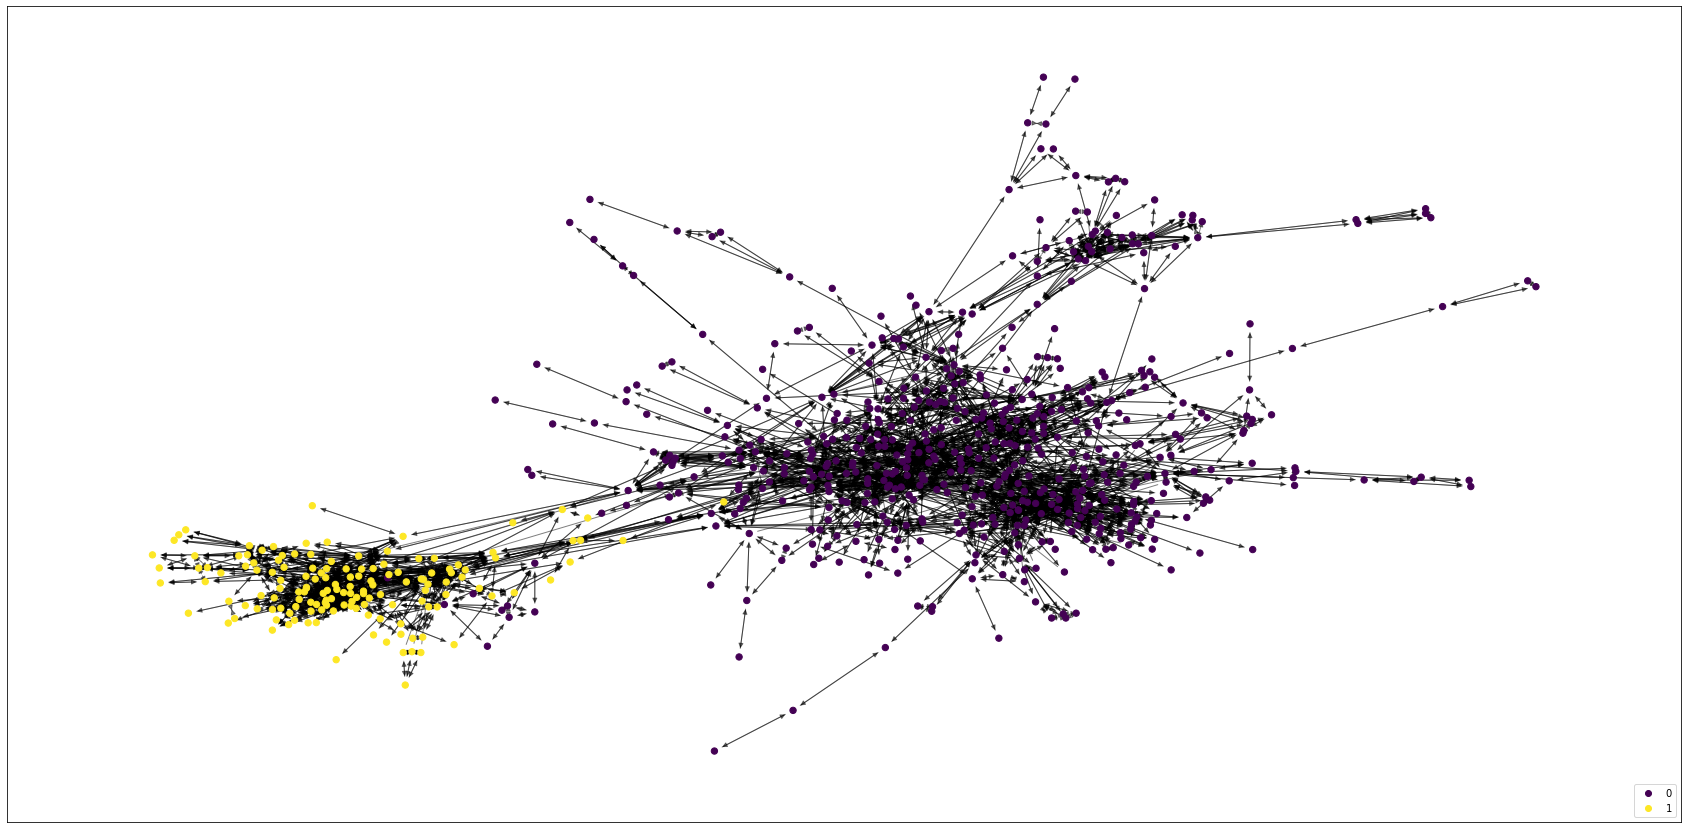

In [26]:
import pickle
from google.colab import drive
from cdlib.algorithms import ilouvain
import networkx as nx
import random
from cdlib.algorithms import eva
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

drive.mount('/content/drive')

with open('/content/drive/MyDrive/ColabNotebooks/Custom_product_graph_nodata.gpickle', 'rb') as f:
  G_load = pickle.load(f)

with open('/content/drive/MyDrive/ColabNotebooks/labels_ilouvain.pkl', 'rb') as f:
  labels = pickle.load(f)

labels['2510'] = {0: 0.0032881612, 1: -7.232755e-05}
labels['6404'] = {0: 0.0032881612, 1: -7.232755e-05}
com = ilouvain(G_load, labels)

test = com.to_node_community_map()
dict_part = dict(test)

#dict_part = dict((k, [int(s) for s in v]) for k,v in dict_part.items())
for k, v in dict_part.items():
    dict_part[k] = int(v[0])
print(dict_part)

cmap = cm.get_cmap('viridis', max(dict_part.values()) + 1)
pos=nx.spring_layout(G_load)
nodes = nx.draw_networkx_nodes(G_load, pos, dict_part.keys(), node_size=40,
                      cmap=cmap, node_color=list(dict_part.values()))
nx.draw_networkx_edges(G_load, pos, alpha=0.5)

# Legend creation
values = sorted(list(set(dict_part.values())))
for v in values:
    # Make dummy scatterplot to generate labels
    plt.gca().scatter([],[], color=nodes.cmap(v/np.max(values)), label=v)
plt.legend(loc='lower right')

fig = plt.gcf()
fig.set_size_inches(30, 15)
plt.show()

**Eva**

In [ ]:
from cdlib.algorithms import eva
import networkx as nx
import random
from cdlib.algorithms import ilouvain
l1 = ['A', 'B', 'C', 'D']
l2 = ["E", "F", "G"]
l3 = ["H", "I"]
g_attr = nx.barabasi_albert_graph(100, 5)
labels=dict()
for node in g_attr.nodes():
  labels[node]={"l1":random.choice(l1), "l2":random.choice(l2), "l3":random.choice(l3)}
print(labels)
print(type(labels))
communities = eva(g_attr, labels, alpha=0.8)
print(communities)

#from cdlib.algorithms import eva
#import networkx as nx
#import random
from google.colab import drive

#This cell allows us to grab our needed resources from Google Drive directly

drive.mount('/content/drive')
g = nx.read_gpickle("/content/drive/MyDrive/ColabNotebooks/product_graphWithData4int.gpickle")
labels_test = g.nodes(data=True)
#print(list(labels_test)[None:5:None])
dict_of_test = nx.to_dict_of_dicts(g)
print(dict_of_test)
dict_test_final = dict_of_test['0102']
print(dict_test_final)
print(type(dict_test_final))
#g1 = nx.DiGraph(g)
g2 = nx.Graph(g)
dict_of_test = nx.to_dict_of_dicts(g2)
dict_test_final = dict_of_test['0102']
print(dict_test_final)

new_dictionary = {'0102': {'weight': 1, 'score_arnault': 0.6781845689, 'score_taoufik': 0.0071981409564614}}
new_dictionary.update(dict_test_final)

print(new_dictionary)

communities = ilouvain(g2, new_dictionary)
communities = eva(g2, new_dictionary)

{0: {'l1': 'D', 'l2': 'E', 'l3': 'I'}, 1: {'l1': 'A', 'l2': 'F', 'l3': 'I'}, 2: {'l1': 'B', 'l2': 'F', 'l3': 'I'}, 3: {'l1': 'A', 'l2': 'F', 'l3': 'H'}, 4: {'l1': 'A', 'l2': 'E', 'l3': 'H'}, 5: {'l1': 'A', 'l2': 'E', 'l3': 'H'}, 6: {'l1': 'D', 'l2': 'E', 'l3': 'H'}, 7: {'l1': 'A', 'l2': 'F', 'l3': 'I'}, 8: {'l1': 'C', 'l2': 'F', 'l3': 'H'}, 9: {'l1': 'C', 'l2': 'F', 'l3': 'I'}, 10: {'l1': 'A', 'l2': 'E', 'l3': 'I'}, 11: {'l1': 'C', 'l2': 'F', 'l3': 'I'}, 12: {'l1': 'C', 'l2': 'G', 'l3': 'I'}, 13: {'l1': 'D', 'l2': 'G', 'l3': 'H'}, 14: {'l1': 'A', 'l2': 'G', 'l3': 'H'}, 15: {'l1': 'B', 'l2': 'G', 'l3': 'I'}, 16: {'l1': 'C', 'l2': 'F', 'l3': 'H'}, 17: {'l1': 'D', 'l2': 'G', 'l3': 'I'}, 18: {'l1': 'B', 'l2': 'E', 'l3': 'I'}, 19: {'l1': 'B', 'l2': 'G', 'l3': 'I'}, 20: {'l1': 'A', 'l2': 'F', 'l3': 'H'}, 21: {'l1': 'B', 'l2': 'F', 'l3': 'I'}, 22: {'l1': 'B', 'l2': 'F', 'l3': 'I'}, 23: {'l1': 'D', 'l2': 'E', 'l3': 'I'}, 24: {'l1': 'C', 'l2': 'F', 'l3': 'I'}, 25: {'l1': 'C', 'l2': 'F', 'l3': '

KeyError: ignored

**Leiden partition of the original graph:**

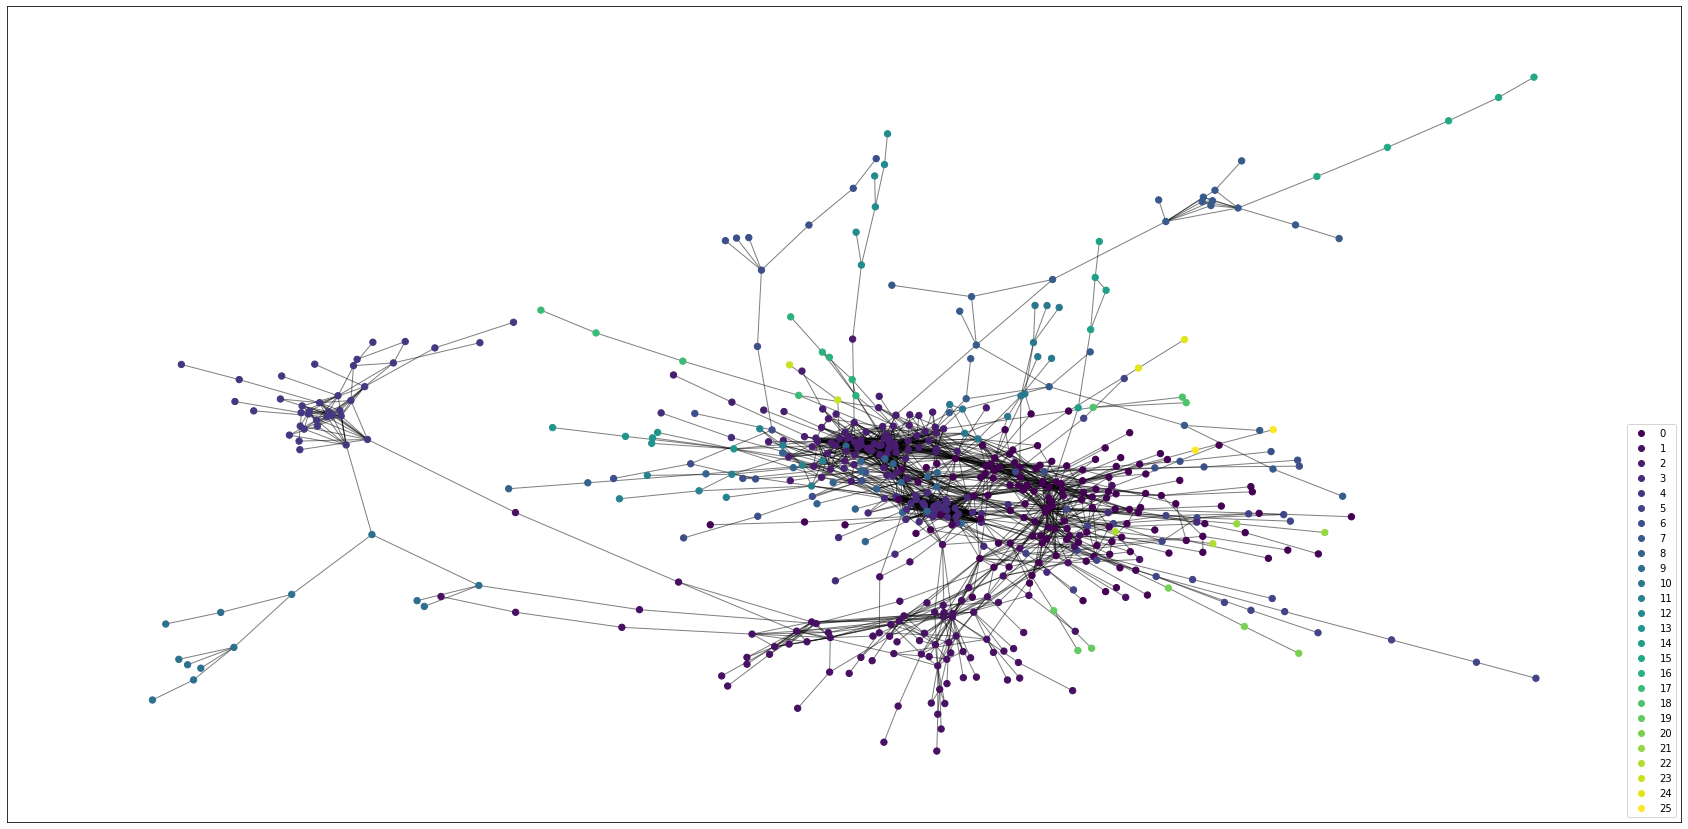

In [32]:
from cdlib import algorithms

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import leidenalg
import igraph as ig
import random

def get_leiden_graph_from_G(G):
  # Leiden partition
  G2 = ig.Graph.from_networkx(G)
  randomlist = []
  for i in range(0,2103):
    n = random.randint(1,30)
    randomlist.append(n)

  # Fake data for the edges
  partition = leidenalg.find_partition(G2, leidenalg.ModularityVertexPartition, weights = randomlist);

  dict_part = dict()
  idx= 0
  for i in partition.membership:
    dict_part[idx] = i
    idx += 1


  A = G2.get_edgelist()
  #G3 = nx.DiGraph(A) # In case the graph is directed
  G3 = nx.Graph(A) # In case the graph is undirected
  pos = nx.spring_layout(G3)

  # Color the nodes according to their partition
  cmap = cm.get_cmap('viridis', max(dict_part.values()) + 1)
  nodes = nx.draw_networkx_nodes(G2, pos, dict_part.keys(), node_size=40,
                        cmap=cmap, node_color=list(dict_part.values()))
  nx.draw_networkx_edges(G3, pos, alpha=0.5)
  
  # Legend creation
  values = sorted(list(set(dict_part.values())))
  for v in values:
      # Make dummy scatterplot to generate labels
      plt.gca().scatter([],[], color=nodes.cmap(v/np.max(values)), label=v)
  plt.legend(loc='lower right')

  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return dict_part, partition

dict_leiden, partition_leiden = get_leiden_graph_from_G(G_positions)

---

**Louvain metrics calculations:**

In [33]:
from sklearn import metrics

label_louvain = list(partition.values())

# todo: find a better way to import the list (of categories from the product space) from the other google colab
activity_sector = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 19, 19, 19, 19, 19, 19, 19, 19, 19, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
activity_sector = activity_sector[:586]

print(metrics.adjusted_rand_score(label_louvain, activity_sector))
print(metrics.rand_score(label_louvain, activity_sector))

print(metrics.adjusted_mutual_info_score(label_louvain, activity_sector))
print(metrics.homogeneity_score(label_louvain, activity_sector))
print(metrics.completeness_score(label_louvain, activity_sector))
print(metrics.v_measure_score(label_louvain, activity_sector))
print(metrics.fowlkes_mallows_score(label_louvain, activity_sector))

0.1231346732488572
0.8271170619293486
0.2510138619716446
0.33182051709906135
0.28073171579528433
0.30414563231986497
0.22056670335370546


**Leiden metrics calculations:**

In [34]:
from sklearn import metrics

label_leiden = partition_leiden.membership

activity_sector = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 19, 19, 19, 19, 19, 19, 19, 19, 19, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
activity_sector = activity_sector[:586]

print(metrics.adjusted_rand_score(label_leiden, activity_sector))
print(metrics.rand_score(label_leiden, activity_sector))

print(metrics.adjusted_mutual_info_score(label_leiden, activity_sector))
print(metrics.homogeneity_score(label_leiden, activity_sector))
print(metrics.completeness_score(label_leiden, activity_sector))
print(metrics.v_measure_score(label_leiden, activity_sector))
print(metrics.fowlkes_mallows_score(label_leiden, activity_sector))

0.12602666154977724
0.8413290160730433
0.2679772039362638
0.3520698861684942
0.3387706259299395
0.3452922450830131
0.21470291364569308


**I-Louvain metrics calculations:**

In [25]:
from sklearn import metrics

label_ilouvain = list(dict_part.values())

# todo: find a better way to import the list (of categories from the product space) from the other google colab
activity_sector = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 19, 19, 19, 19, 19, 19, 19, 19, 19, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
label_ilouvain = label_ilouvain[:634]

print(metrics.adjusted_rand_score(label_ilouvain, activity_sector))
print(metrics.rand_score(label_ilouvain, activity_sector))

print(metrics.adjusted_mutual_info_score(label_ilouvain, activity_sector))
print(metrics.homogeneity_score(label_ilouvain, activity_sector))
print(metrics.completeness_score(label_ilouvain, activity_sector))
print(metrics.v_measure_score(label_ilouvain, activity_sector))
print(metrics.fowlkes_mallows_score(label_ilouvain, activity_sector))

0.04076000300137176
0.2981894837561858
0.22265628593818443
0.8927035705457238
0.1314301113231363
0.22912659105456426
0.30181940163844573


---

TEST ZONE:

In [ ]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# First file.json that contains two dataframes, one with nodes infos and the other with the edges
with open('/content/drive/MyDrive/ColabNotebooks/dynamic_productspace_FRA.json') as json_data:
    data = json.load(json_data)
df = pd.DataFrame(data)
#df = pd.DataFrame(data['edges'])
print(df)